## Árvores de regressão - exercícios 02

Este exercício será uma continuação do anterior, mesma base, mesmas variáveis - vamos tentar buscar a 'melhor árvore'.


*Atenção - Utilizar a base de dados em anexo que é a mesma base que utilizamos na atividade anterior! A base Boston, assim como para a primeira atividade foi descontinuada e não deve ser utilizada*

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

### 1. Execute os passos do exercício anterior, até que você tenha uma árvore de regressão predizendo o valor do imóvel na base de treinamento.

In [9]:
df = pd.read_csv('novo_housing.csv')

In [15]:
X = df.drop('median_house_value', axis = 1)
y = df.median_house_value

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 50)

In [13]:
arvore_regressora = DecisionTreeRegressor(max_depth = 8)
arvore_regressora.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=8)

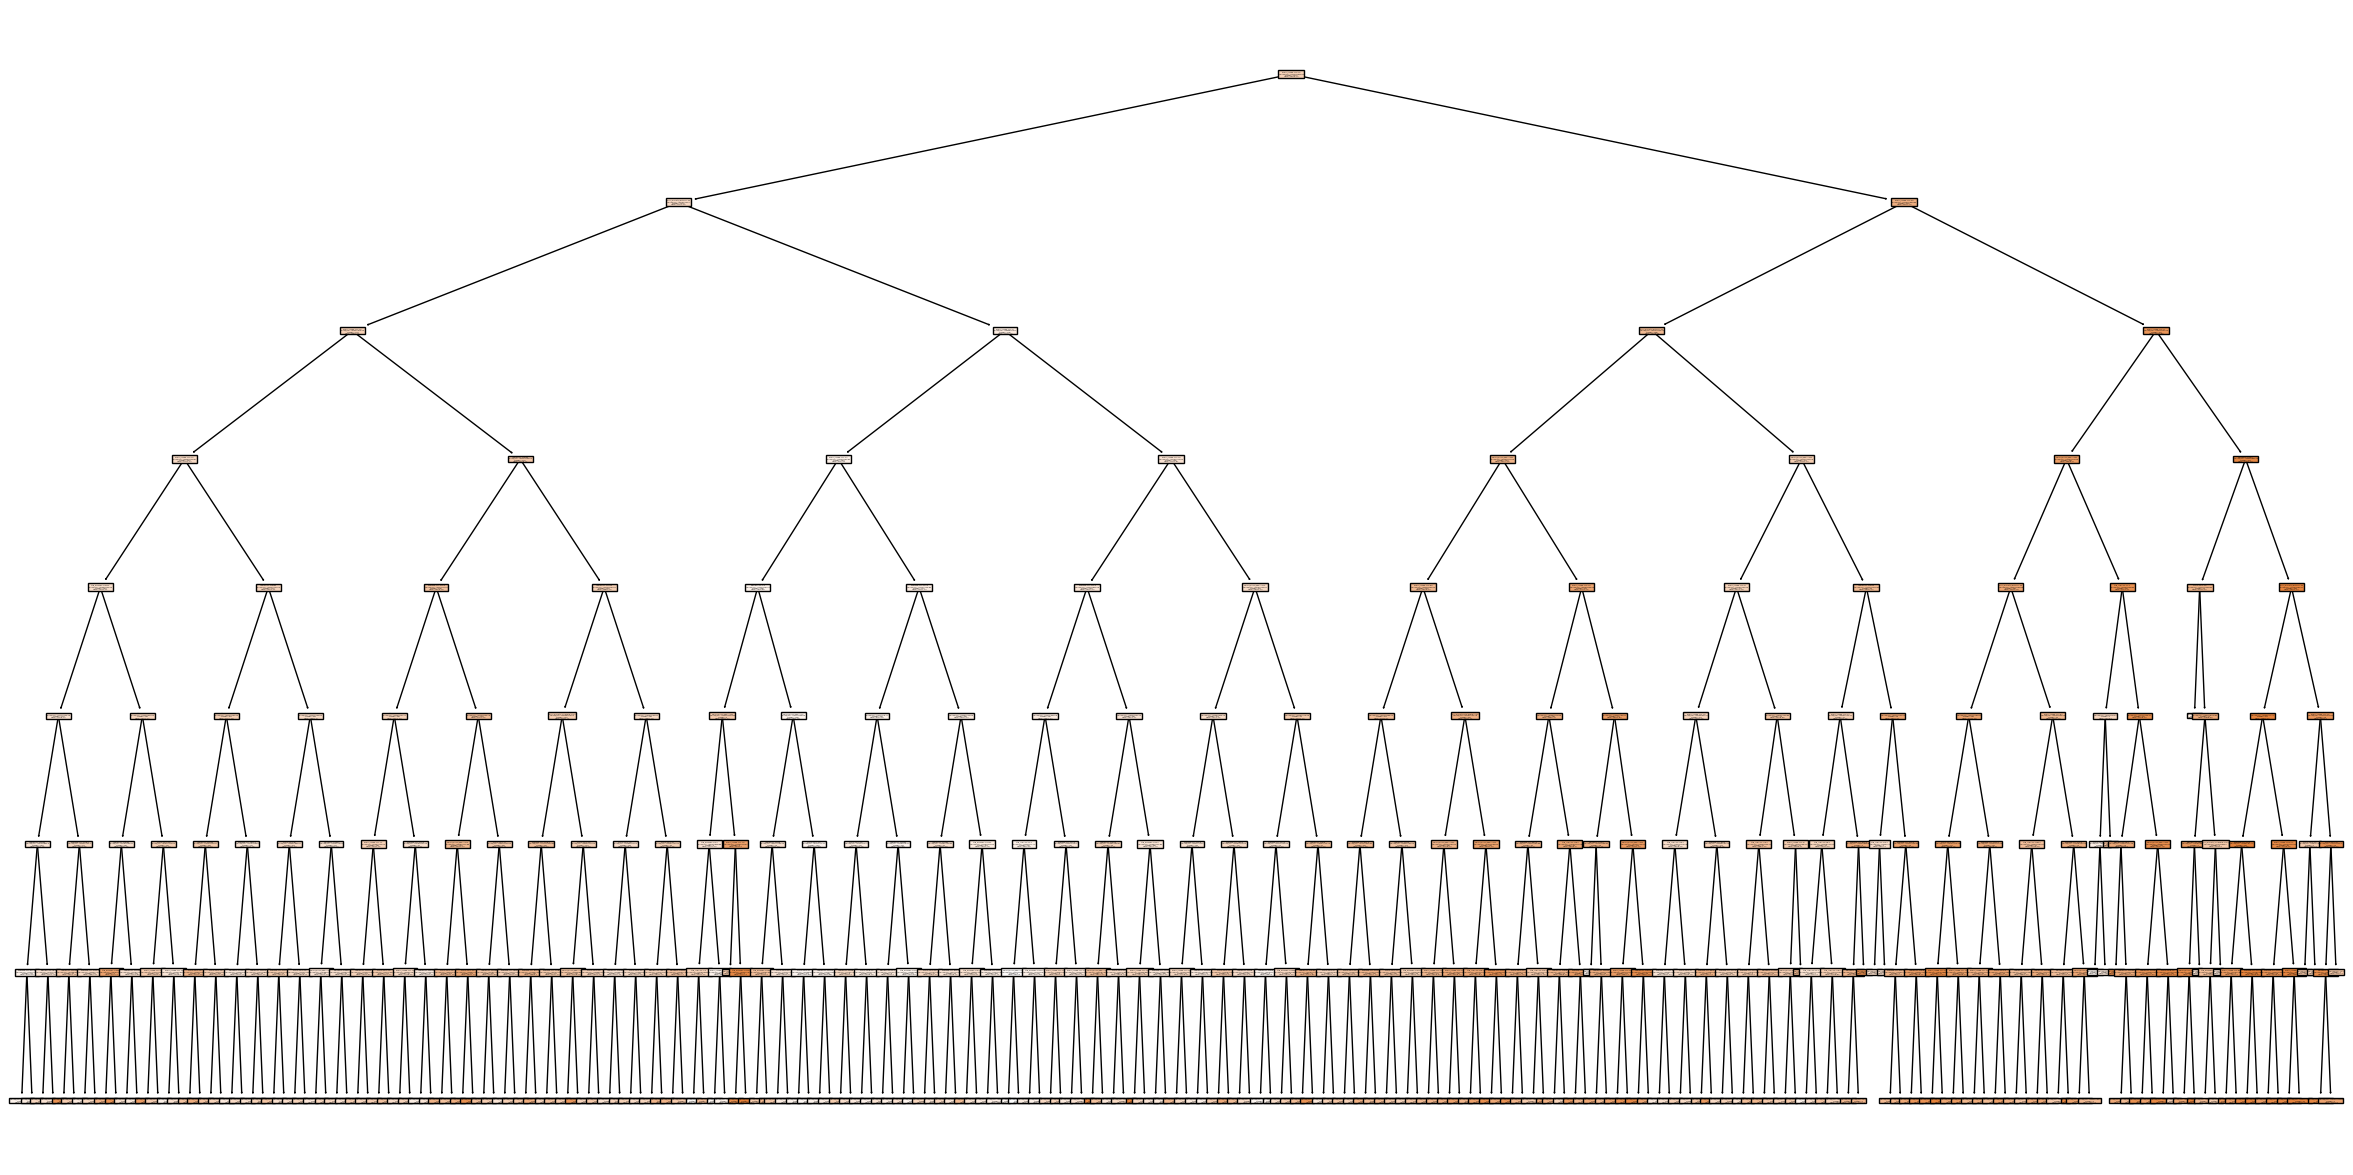

In [31]:
plt.rc('figure', figsize = (30, 15))
tp = tree.plot_tree( arvore_regressora,
                    feature_names = X.columns,
                    filled = True)

### 2.  Calcule o caminho indicado pelos CCP-alfas dessa árvore.

In [35]:
path = arvore_regressora.cost_complexity_pruning_path(X_train, y_train)

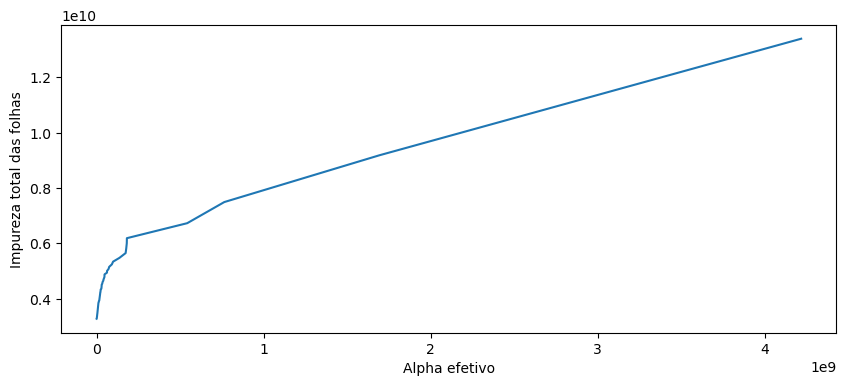

In [47]:
ccp_alphas, impurities = path.ccp_alphas, path.impurities

#Visualização do gráfico
plt.figure(figsize=(10,4))
plt.plot(ccp_alphas, impurities)
plt.xlabel('Alpha efetivo')
plt.ylabel('Impureza total das folhas')
plt.show()

### 3. Para cada valor de alpha obtido no item 2, treine uma árvore com o respectivo alfa, e guarde essa árvore em uma lista.

In [57]:
clfs = []

for ccp_alpha in ccp_alphas:
    clf = DecisionTreeRegressor(random_state = 0, ccp_alpha = ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

### 4. Para cada árvore na lista, calcule o MSE da árvore.

In [63]:
train_scores = [mean_squared_error(y_train, clf.predict(X_train)) for clf in clfs]
test_scores  = [mean_squared_error(y_test, clf.predict(X_test)) for clf in clfs]   

### 5. Monte um gráfico do MSE pelo alpha, escolha um valor de alpha perto do ponto de mínimo do MSE

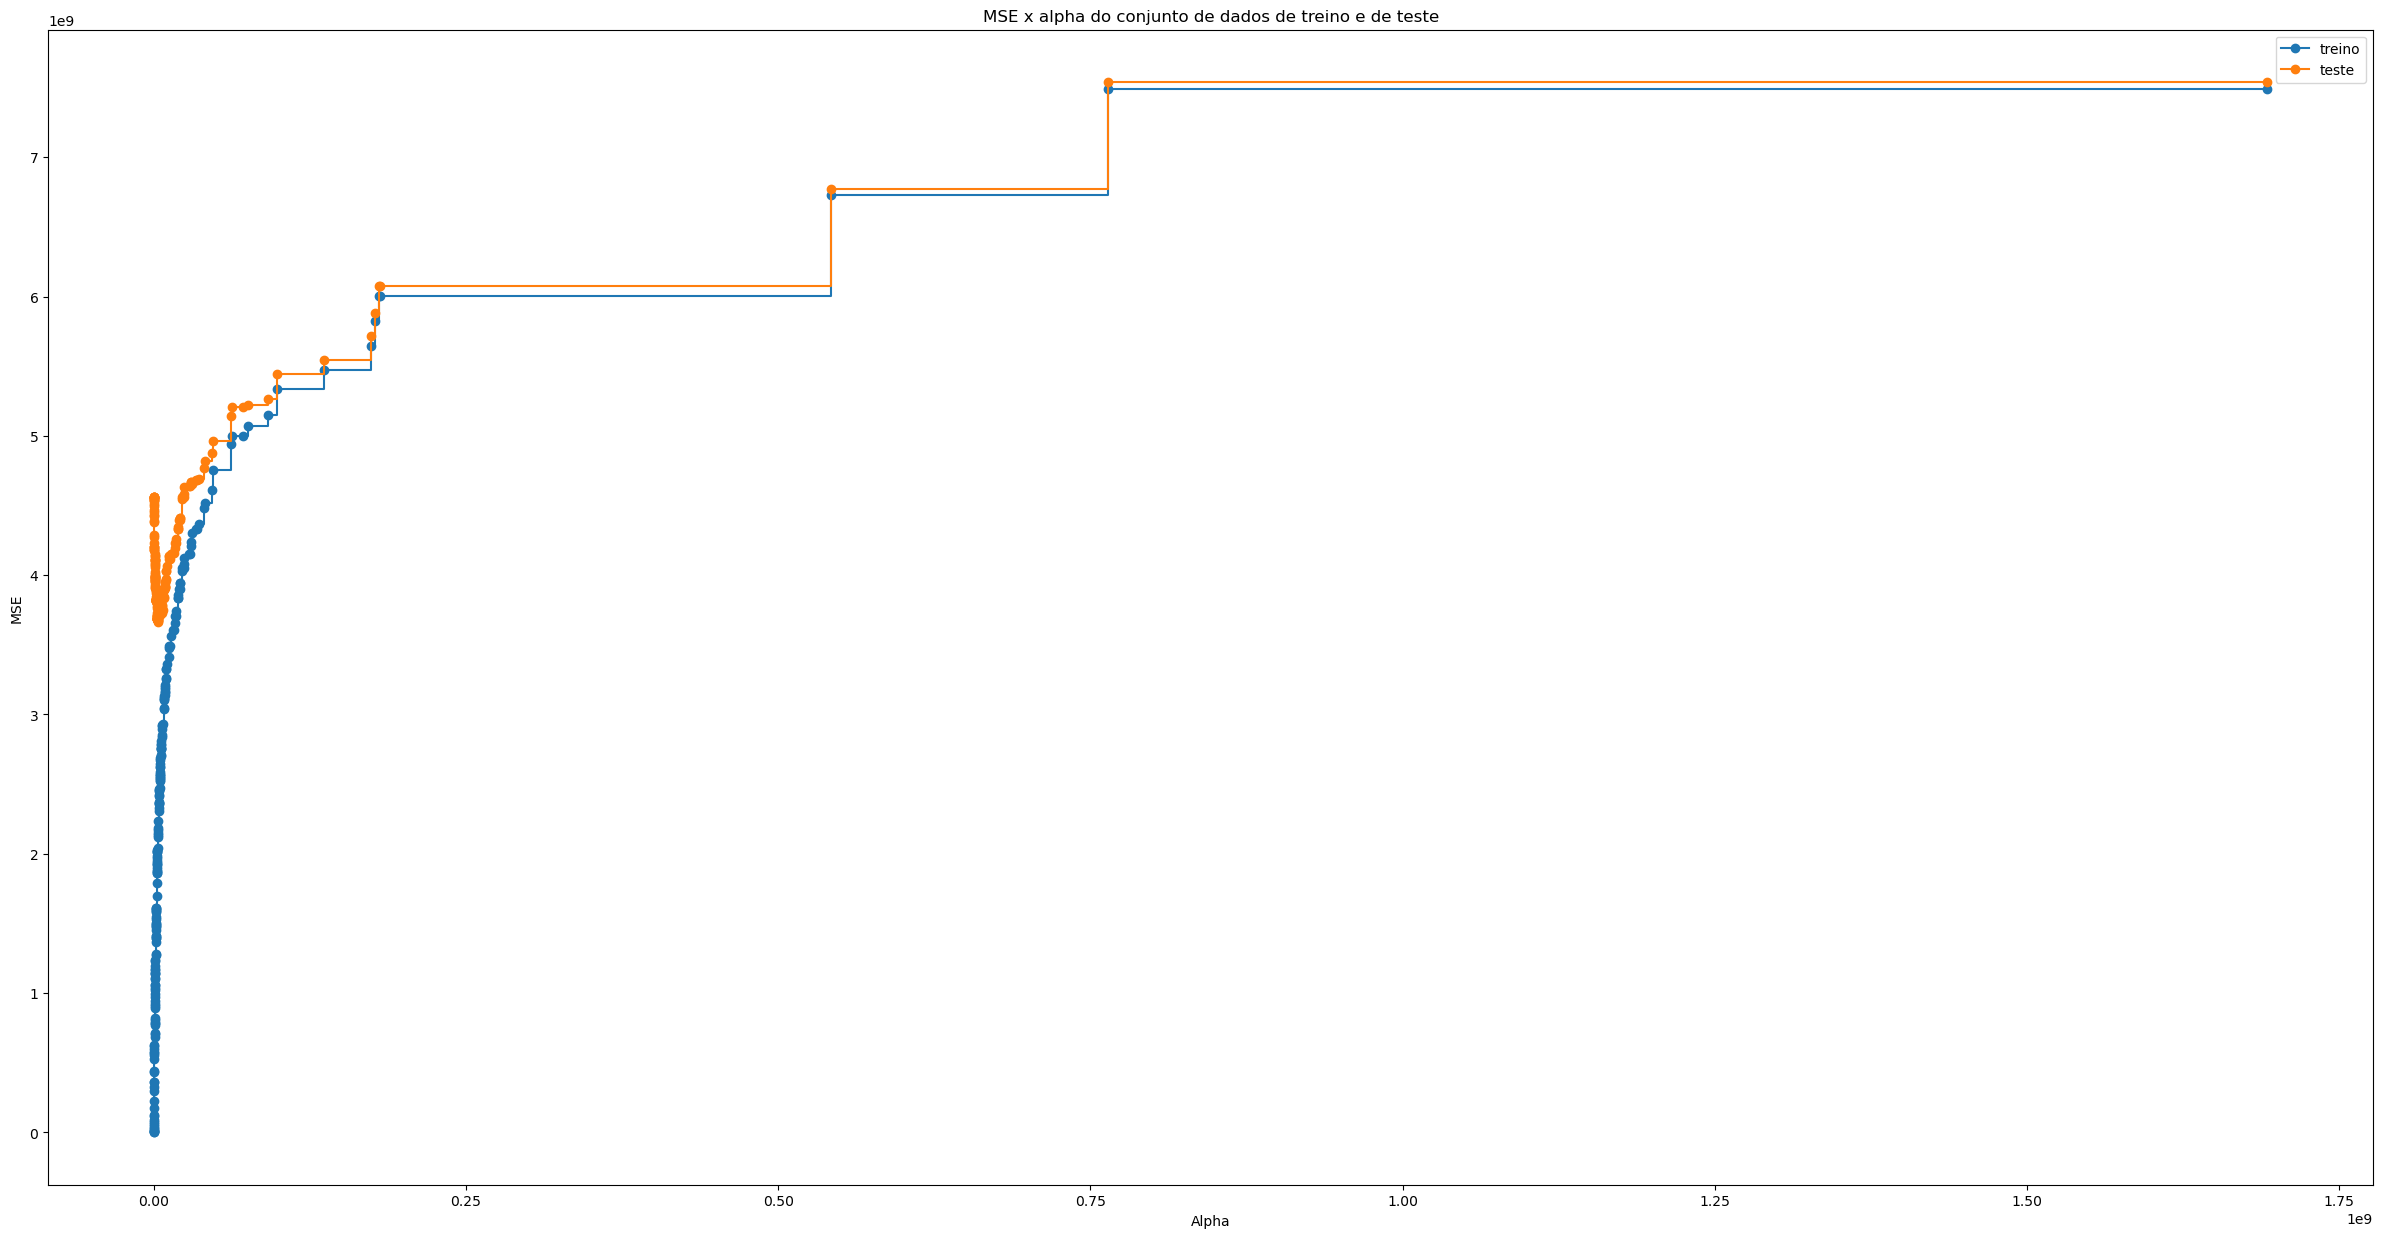

In [69]:
fig, ax = plt.subplots()
ax.set_xlabel("Alpha")
ax.set_ylabel("MSE")
ax.set_title("MSE x alpha do conjunto de dados de treino e de teste")
ax.plot(ccp_alphas[:-1], train_scores[:-1], marker='o', label='treino', drawstyle='steps-post')
ax.plot(ccp_alphas[:-1], test_scores[:-1], marker='o', label='teste', drawstyle='steps-post')
ax.legend()
plt.show()        


### 6. Calcule o R-quadrado dessa árvore encontrada no item acima

In [83]:
arvore = DecisionTreeRegressor(random_state=0, ccp_alpha=.005)
arvore.fit(X_train, y_train)

print(f"Profundidade:{arvore.tree_.max_depth}")
print(f"R-quadrado na base de teste:{arvore.score(X_test, y_test):.2f}")

Profundidade:34
R-quadrado na base de treino:0.65


### 7. Visualize esta árvore.

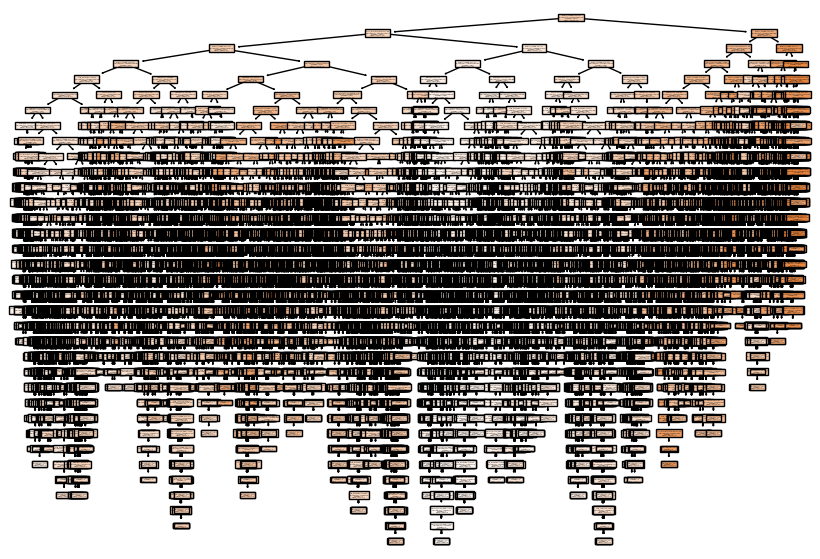

In [89]:
plt.figure(figsize=(10,7))
tp = tree.plot_tree(arvore,
                    feature_names = X.columns,
                    filled = True)